# It's Time For You To Understand Pandas GroupBy Function

With its 1.0.0 relelase on January 29, 2020 pandas reached its maturity as a data manipulation library.
Pandas provides a framework that is also suitable for [OLAP](https://www.guru99.com/online-analytical-processing.html) operations and it is the to-go tool for business intelligence in python.

In this guide I would like to explain, by showing different example and applications of the `groupby` function provided by Pandas, which is the equivalent of the omonimous `GROUP BY` provided in the SQL language.

Grouping data is among one of the most basic operations to generate reports and find insights in structured data it helps answering business questions such as: how many revenues we have for each country? Which are the most sold items by country? How are sales are going over time? How our sales are going compared to the previous year for country x?


## Let's Get Started:

The synthax of `groupby` function can be easely explained as shown here:

![image](./groupby.png)

The synthax of `groupby` can be decomposed in four different group:

- We used this function by calling it to a dataframe.
- We specifiy a list of columns to which we want group our dataframe and all the optional argument (Available in the [official Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html))
- We define an aggregation function or a group of aggregation functions to apply to each column
- Optionally we can add any function that is applicable to a dataframe, as the the combination of the previous steps returns a dataframe.

## The Analogy with SQL

Let's takethe most basic `groupby` synthax and compare it with SQL:

![SQL](sql.png)

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('./data.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Group Sales by Country:

If you ever approached a basic SQL course or even some spreadsheet notes you encountered this task before. It s one of the most basic business intelligence taks you can encounter, yet ond of the most used. Let's see how to tackle it:

In [0]:
df[['Country', 'Quantity']].groupby('Country').sum().head()

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356


By using double sqaure brackets we can select column by names.

However, by default`groupby` does not sort values, but we can add a function that will sort our dataframe:

In [0]:
df[['Country', 'Quantity']].groupby('Country').sum().sort_values(by='Quantity', ascending=False).head()

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480


## Group Sales by Date

Similarly to what we did before, grouping quantity sold by date is another, extremely common operation.However, the column representing dates needs to be parsed appropriately: to group sales by date we need first to to convert our date column in a format understadable by pandas, then to bring our date column to the granularity we are interested, it can be at day level, month, week number and so on.

Avoiding to do this second operation will lead to a dataframe grouped by the exact timestamp a transaction was made, which makes completely no sense:

In [0]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df[['InvoiceDate', 'Quantity']].groupby('InvoiceDate').sum().sort_values(by='Quantity', ascending=False).head()

,Quantity
InvoiceDate,
2011-12-09 09:15:00,80995
2011-01-18 10:01:00,74215
2011-06-15 13:37:00,15241
2011-08-11 16:12:00,14730
2011-11-07 17:42:00,14149


Each transaction is grouped by date at minute level, which leads to data that is not regularly organised.
To change our granularity and group by at date level, the `.dt` util from pandas will become handy:

In [0]:
df[['InvoiceDate', 'Quantity']].groupby(df['InvoiceDate'].dt.date).sum().sort_values(by='Quantity', ascending=False).head()

,Quantity
InvoiceDate,
2011-10-05,46161
2011-11-14,45959
2011-12-05,44119
2011-09-20,43702
2011-10-20,40802


Similarly, in business, sometimes we want to group our data by week, as well in this situation the `.dt` util will help us. You can think of this util as the `DATEPART` function in SQL:

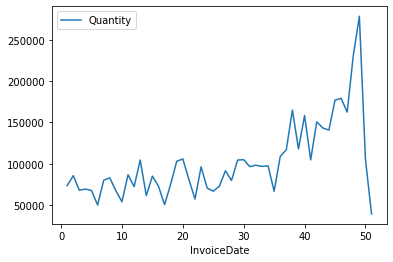

In [0]:
df[['InvoiceDate', 'Quantity']].groupby(df['InvoiceDate'].dt.week).sum().plot()

Another example of a function we can then apply to our dataframe, the `.plot()` function.

## Grouping by Multiple Variables:

Till now, we grouped our dataframe bu just one variable, let's now do something a bit more "advanced" by adding a second grouping variable: the country. This operation can help us to gain more insights about transactions.
To group by multiple columns we need to pass `groupby` a list of columns we want to group by:

In [0]:
df[['InvoiceDate', 'Quantity', 'Country']].groupby([df['InvoiceDate'].dt.month, df['Country']]).sum().head()

Quantity
InvoiceDate Country                  
1           Australia            5644
            Bahrain               -54
            Belgium               783
            Channel Islands       255
            Cyprus                144

What can we see here? Our dataframe has now what is called a multiindex, which describes the two different levels of aggregation. Multiindex are useful when dealing with data that has multiple levels of aggregation, such as by date, by week number, by year and so on. 

We can rename our Muliindex to make it more consistent with our data by using the `set_names` method:

In [0]:
year_week = df[['InvoiceDate', 'Quantity', 'Country']]
year_week = year_week.groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.week, df['Country']]).sum()
year_week.index = year_week.index.set_names(['Year', 'Week', 'Country'])

year_week.head()

Quantity
Year Week Country            
2010 48   Australia       107
          Belgium         528
          EIRE           2822
          France         1299
          Germany        1795

If, for some reasons, we want to get rid of it we can use the `reset_index()` after the aggregation function, this will returna  dataframe similar to the result on an SQL query.

In addition, grouping by year and week number is very common in real life, it gives the opportunity to compare, for example, seasonality between different years:

In [0]:
year_week = df[['InvoiceDate', 'Quantity', 'Country']]
year_week = year_week.groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.week]).sum()
year_week.index = year_week.index.set_names(['Year', 'Week'])

year_week.head()

Quantity
Year Week          
2010 48       79062
     49      118448
     50      105446
     51       39272
2011 1        73491

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F9FADEF08>,
      dtype=object)

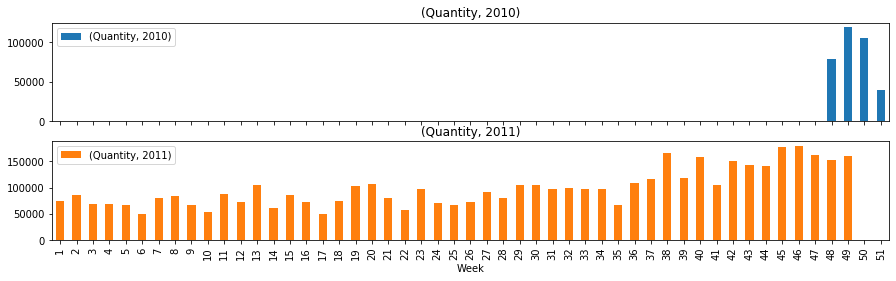

In [0]:
year_week.unstack(level=0).plot(kind='bar', subplots=True, figsize=(15, 4))

Since we only have few week from 2011, the first plot is mostly empty.

Similarly, we can do another report by grouping county and description and sorting descending. 

In other words: lets answer to the question which are the most sold items for each country?

In [0]:
items_sold = df[['Description', 'Country', 'Quantity']]

items_sold.groupby(['Country', 'Description']).sum().sort_values(by='Quantity', ascending=False)

Quantity
Country        Description                                 
United Kingdom WORLD WAR 2 GLIDERS ASSTD DESIGNS      48326
               JUMBO BAG RED RETROSPOT                43167
               POPCORN HOLDER                         34365
               ASSORTED COLOUR BIRD ORNAMENT          33679
               WHITE HANGING HEART T-LIGHT HOLDER     33193
...                                                     ...
               Damaged                                -7540
               Printing smudges/thrown away           -9058
               check                                 -12030
               Unsaleable, destroyed.                -15644
               printing smudges/thrown away          -19200

[20176 rows x 1 columns]

Analogously, this is how we would write this query in SQL:

`SELECT Country, Description, sum(Quantity)
FROM df
GROUP BY Country, Description
ORDER BY Quantity DESC`

## Grouping by Multiple aggregation Functions

Similarly to SQL, `groupby` offers a solution to group by applying different function to different columns, to achieve this, we need to apply after the `groupby` the`.agg()` function that specifies the functions to apply to each columns. 

Let's group by country and aply sum for quantity and average for the unit price:

In [0]:
country_agg = df[['Country', 'Quantity', 'UnitPrice']]
country_agg = country_agg.groupby(['Country']).agg({'Quantity':'sum', 'UnitPrice':'mean'})

country_agg.head()

,Quantity,UnitPrice
Country,,
Australia,83653,3.220612
Austria,4827,4.243192
Bahrain,260,4.556316
Belgium,23152,3.644335
Brazil,356,4.456250


Another important usage of `.agg()` is when, for example, we want to aply different function to the same column. Let's say we want to group by country, get the average unit price and sum the qunatity, but at the same time get the minimum and maximum quantity sold:

In [0]:
country_agg = df[['Country', 'Quantity', 'UnitPrice']]
country_agg = country_agg.groupby(['Country']).agg({'Quantity':['min', 'max', 'sum'], 'UnitPrice':'mean'})

country_agg.head()

Quantity              UnitPrice
               min   max    sum      mean
Country                                  
Australia     -120  1152  83653  3.220612
Austria        -48   288   4827  4.243192
Bahrain        -54    96    260  4.556316
Belgium        -12   272  23152  3.644335
Brazil           2    24    356  4.456250

In [0]:
items_sold = df[['Description', 'Country', 'Quantity']]
items_sold.groupby(['Country', 'Description']).sum()

Quantity
Country     Description                            
Australia    DOLLY GIRL BEAKER                  200
             I LOVE LONDON MINI BACKPACK          4
            10 COLOUR SPACEBOY PEN               48
            12 PENCIL SMALL TUBE WOODLAND       384
            12 PENCILS TALL TUBE POSY           252
...                                             ...
Unspecified WRAP POPPIES  DESIGN                 25
            WRAP SUKI AND FRIENDS                25
            WRAP VINTAGE PETALS  DESIGN          25
            WRAP WEDDING DAY                     25
            ZINC METAL HEART DECORATION           2

[20176 rows x 1 columns]